# Capstone Project :Walmart Project

Problem Statement :
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.


Project Objective :
The objective of this project is to Using the data, come up with useful insights that can be used by each of the stores to improve in various areas and Forecast the sales for each store for the next 12 weeks.

Data Description
In this project, we will use the weekly sales data provided by Walmart, which can be downloaded from here. It consists of historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and our objective is to predict the department-wide sales for each store. We will apply regression analysis to forecast the sales for each department based on multiple factors, such as temperature, fuel price, store type, CPI, employment index, etc.

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("Walmart (1) (1).csv")

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
# create year, month, and date
df['Date'] = pd.to_datetime(df['Date'])
df['month_date'] = df['Date'].apply(lambda i : i.month)
df['day_date'] = df['Date'].apply(lambda i : i.day)
df['year_date'] = df['Date'].apply(lambda i : i.year)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   month_date    6435 non-null   int64         
 9   day_date      6435 non-null   int64         
 10  year_date     6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month_date,day_date,year_date
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,19,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,26,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


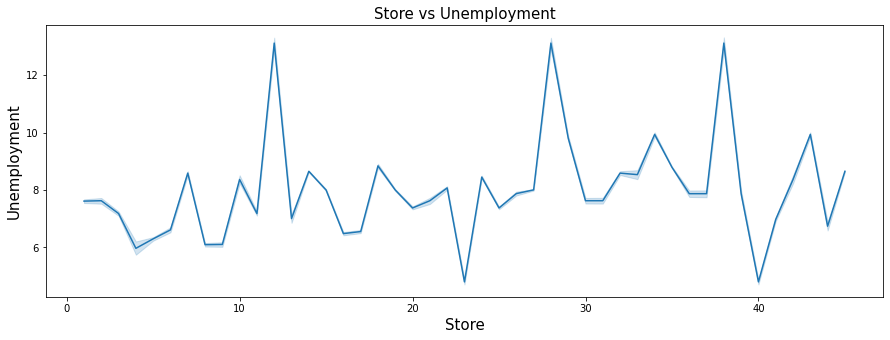

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df["Store"],y=df["Unemployment"])
plt.title("Store vs Unemployment",fontsize=15)
plt.xlabel("Store",fontsize=15)
plt.ylabel("Unemployment",fontsize=15)
plt.show()

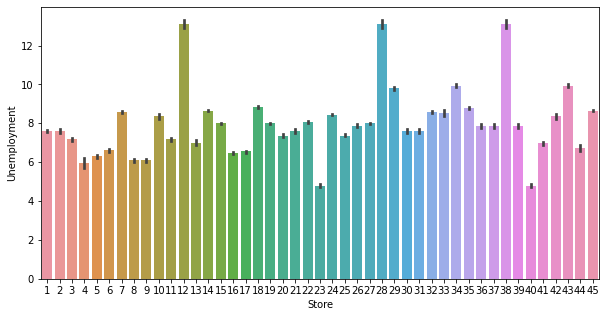

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["Store"],y=df["Unemployment"])
plt.show()

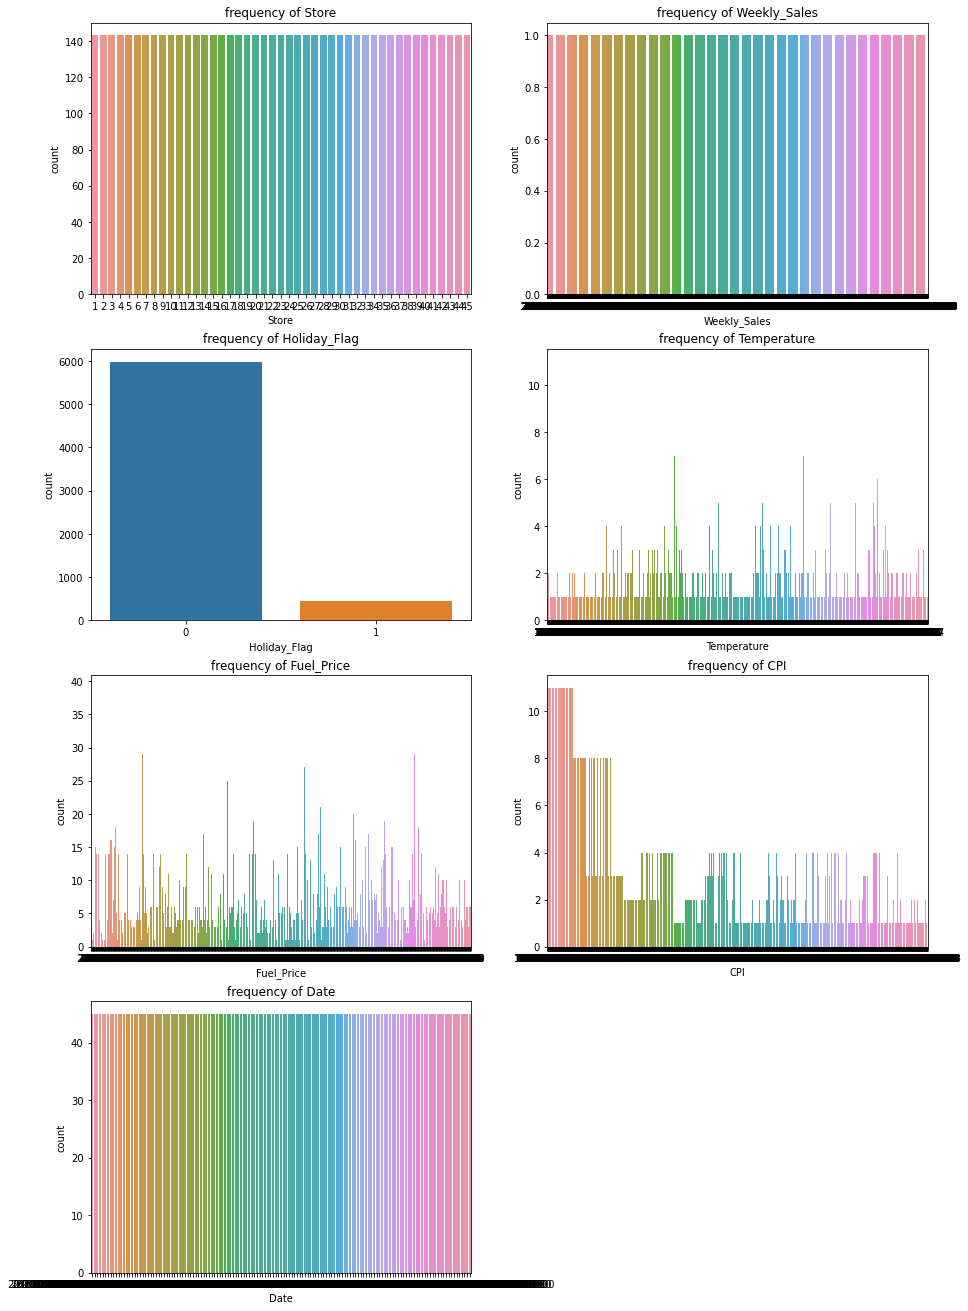

In [11]:
plt.figure(figsize=(15,23))
plt.subplot(4,2,1)
sns.countplot(x=df['Store'],data=df)
plt.title('frequency of Store')

plt.subplot(4,2,2)
sns.countplot(x=df['Weekly_Sales'],data=df)
plt.title('frequency of Weekly_Sales')

plt.subplot(4,2,3)
sns.countplot(x=df['Holiday_Flag'],data=df)
plt.title('frequency of Holiday_Flag')

plt.subplot(4,2,4)
sns.countplot(x=df['Temperature'],data=df)
plt.title('frequency of Temperature')
           
plt.subplot(4,2,5)
sns.countplot(x=df['Fuel_Price'],data=df)
plt.title('frequency of Fuel_Price')
           
plt.subplot(4,2,6)
sns.countplot(x=df['CPI'],data=df)
plt.title('frequency of CPI')
           
plt.subplot(4,2,7)
sns.countplot(x=df['Date'],data=df)
plt.title('frequency of Date')

plt.show()

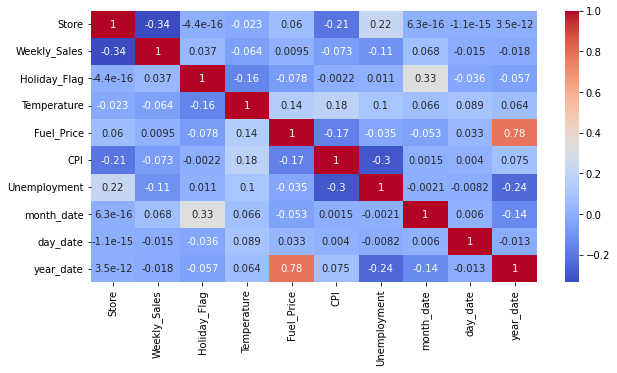

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

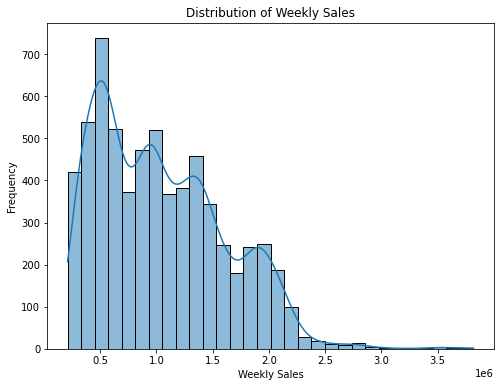

In [15]:
# Visualize the distribution of Weekly_Sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


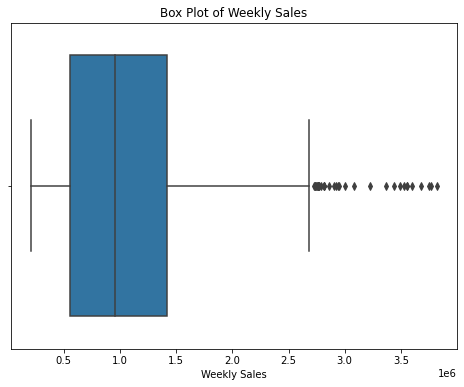

In [16]:
# Box plot for Weekly_Sales to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Box Plot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

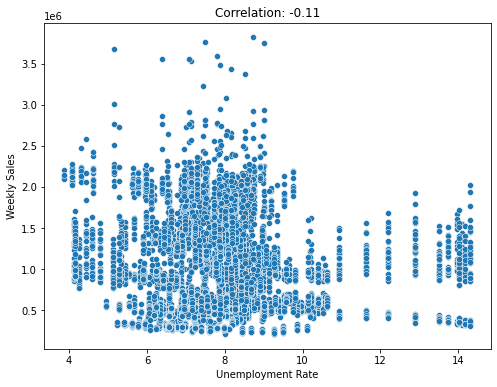

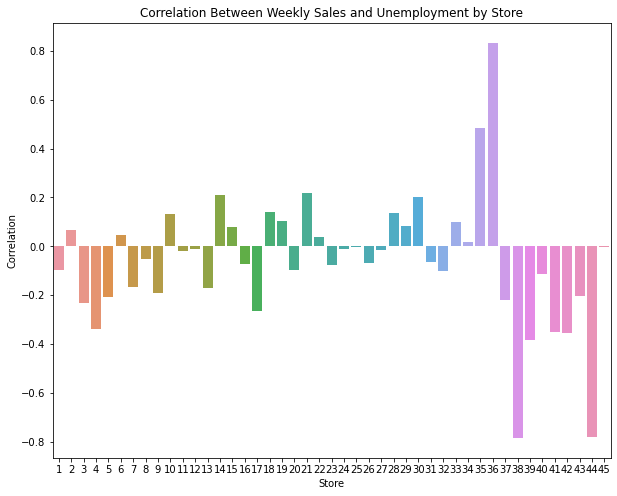

In [17]:
df.dropna(subset=['Weekly_Sales', 'Unemployment'], inplace=True)

# Calculate the correlation between Weekly_Sales and Unemployment
correlation = df['Weekly_Sales'].corr(df['Unemployment'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

# Store-level analysis
store_correlations = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().iloc[0::2, 1].reset_index()

# Visualize store-level correlations
plt.figure(figsize=(10, 8))
sns.barplot(data=store_correlations, x='Store', y='Unemployment', ci=None)
plt.title('Correlation Between Weekly Sales and Unemployment by Store')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.show()

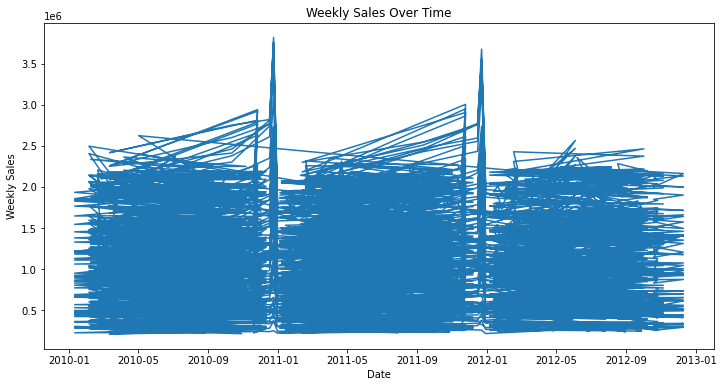

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame
df.set_index('Date', inplace=True)

# Time series plot of 'Weekly_Sales'
plt.figure(figsize=(12, 6))
plt.plot(df['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

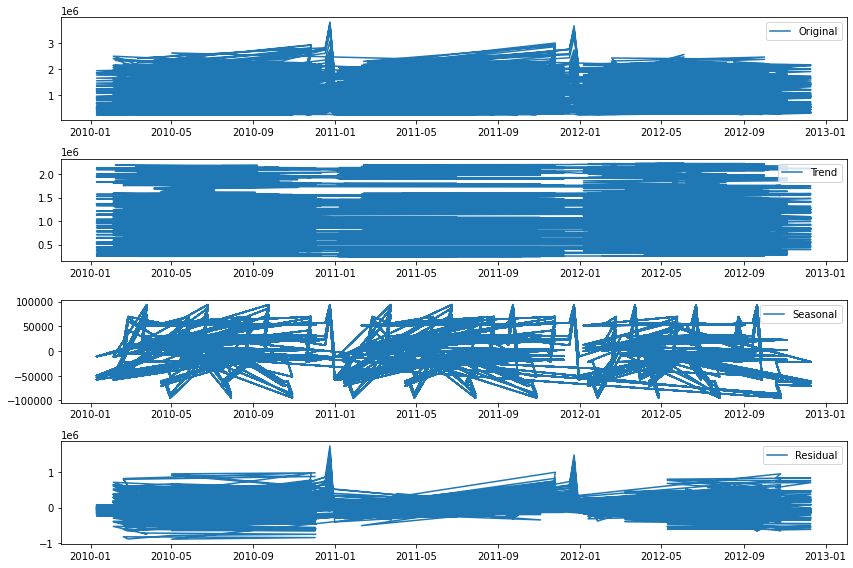

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive',extrapolate_trend='freq', period=52)  # Assuming weekly data (52 weeks in a year)

# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Weekly_Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

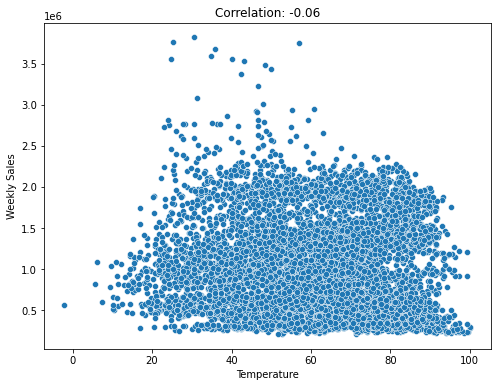

In [27]:
# Calculate the correlation between Weekly_Sales and Temperature
correlation = df['Weekly_Sales'].corr(df['Temperature'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales')
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

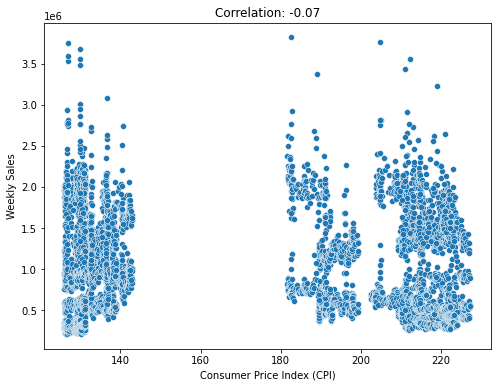

In [28]:
# Calculate the correlation between Weekly_Sales and CPI
correlation = df['Weekly_Sales'].corr(df['CPI'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

In [29]:
# Group the data by 'Store' and calculate the total sales for each store
store_total_sales = df.groupby('Store')['Weekly_Sales'].sum()

# Alternatively, you can calculate other metrics like average sales:
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean()


In [30]:
top_stores = store_total_sales.sort_values(ascending=False)

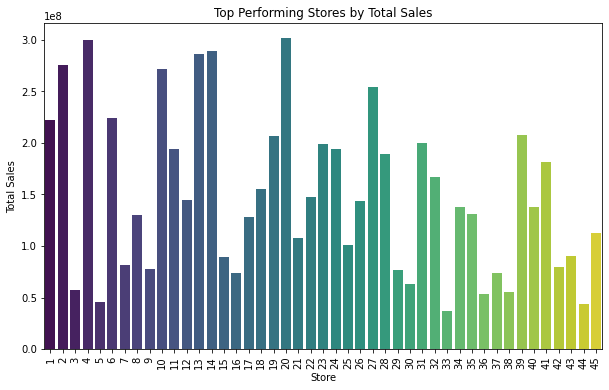

In [31]:
# Visualize the top-performing stores
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stores.index, y=top_stores.values, palette="viridis")
plt.title('Top Performing Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [32]:
# Group the data by 'Store' and calculate the total sales for each store
store_total_sales = df.groupby('Store')['Weekly_Sales'].sum()
# Sort stores based on total sales in ascending order to find the worst-performing store
worst_store = store_total_sales.sort_values(ascending=True).head(1)
# Find the best-performing store
best_store = store_total_sales.sort_values(ascending=False).head(1)

# Calculate the difference in total sales between the best and worst stores
difference = best_store.values[0] - worst_store.values[0]

print(f"The worst-performing store is Store {worst_store.index[0]} with total sales of ${worst_store.values[0]:,.2f}.")
print(f"The best-performing store is Store {best_store.index[0]} with total sales of ${best_store.values[0]:,.2f}.")
print(f"The difference between the best and worst stores is ${difference:,.2f}.")


The worst-performing store is Store 33 with total sales of $37,160,221.96.
The best-performing store is Store 20 with total sales of $301,397,792.46.
The difference between the best and worst stores is $264,237,570.50.


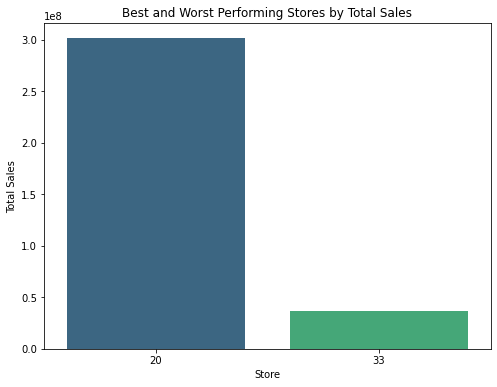

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x=[best_store.index[0], worst_store.index[0]], y=[best_store.values[0], worst_store.values[0]], palette="viridis")
plt.title('Best and Worst Performing Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

# Define the features (independent variables) and the target variable (dependent variable)
X = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loop through each store
for store_number in range(1, num_stores + 1):  # Assuming 'num_stores' is the total number of stores
    # Filter data for the current store
    store_data = df[df['Store'] == store_number]
    
    # Define SARIMA orders for the current store based on analysis
    p, d, q, P, D, Q, S = 1, 1, 1, 1, 1, 1, 52  # Specify the appropriate orders
    
    # Define and fit the SARIMA model for the current store
    model = SARIMAX(store_data['Weekly_Sales'], order=(p, d, q), seasonal_order=(P, D, Q, S))
    results = model.fit()

    # Forecast the next 12 weeks for the current store
    forecast = results.get_forecast(steps=12)
    
    # Extract and store the forecasts for the current store
    store_forecast = forecast.predicted_mean
    
    

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users

In [61]:
store_forecast

143    7.607990e+05
144    7.150284e+05
145    9.065996e+05
146    7.184875e+05
147    9.243946e+05
148    7.331136e+05
149    1.002887e+06
150    1.377018e+06
151    7.668334e+05
152    7.639670e+05
153    7.212402e+05
154    6.861079e+05
Name: predicted_mean, dtype: float64

In [62]:
forecast

#Motivation and Reasons For Choosing the Algorithm
the motivation for choosing the SARIMA algorithm for Walmart store sales forecasting is driven by the need for accurate predictions to optimize inventory, resource allocation, and profitability in a retail business with complex seasonal patterns and a vast amount of historical data. SARIMA is a proven and reliable method for addressing these challenges and supporting data-driven decision-making in a retail giant like Walmart.

#Assumptions
These assumptions provide a framework for understanding the limitations and considerations in Walmart's store sales forecasting. While models like SARIMA are powerful tools, they are not immune to deviations from these assumptions. Careful data analysis and model evaluation are necessary to improve forecasting accuracy and address potential challenges.

#Future Possibilities of the Project
The future possibilities for Walmart store's sales forecasting are vast and extend beyond mere prediction. Enhanced forecasting capabilities can drive innovation, cost savings, sustainability, and customer satisfaction. It's essential to adapt to changing market dynamics, technologies, and customer expectations to stay competitive in the retail industry.

#Conclusion
In conclusion, accurate sales forecasting is not only a fundamental aspect of Walmart's business operations but also a driver of efficiency, profitability, and customer satisfaction. It enables Walmart to navigate the complexities of the retail industry and make data-informed decisions, ultimately benefiting both the company and its customers. The future of sales forecasting at Walmart holds the promise of even more advanced and personalized forecasting solutions that can further elevate the retail giant's performance in a rapidly evolving marketplace.